In [ ]:
“Unemployment Analysis with Python”

🧠 Project: Unemployment Analysis with Python

Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment in India.csv to Unemployment in India.csv


In [3]:
df = pd.read_csv("Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


 Step 3: Explore the Data

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [5]:
df.columns = df.columns.str.strip()


 Step 4: Display Basic Insights

In [6]:
print("Total Rows and Columns:", df.shape)
print("Unique Regions:", df['Region'].unique())


Total Rows and Columns: (768, 7)
Unique Regions: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']


 Step 5: Check for Missing Values

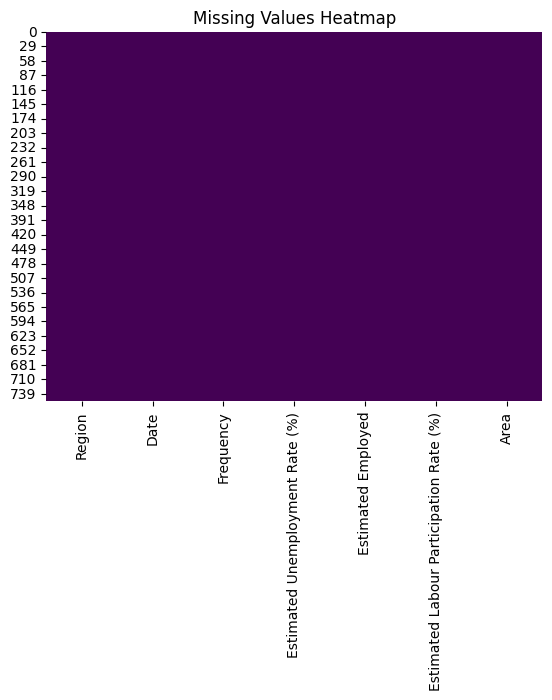

In [10]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
df = df.dropna()


 Step 6: Data Visualization

 6.1 Unemployment Rate by Region

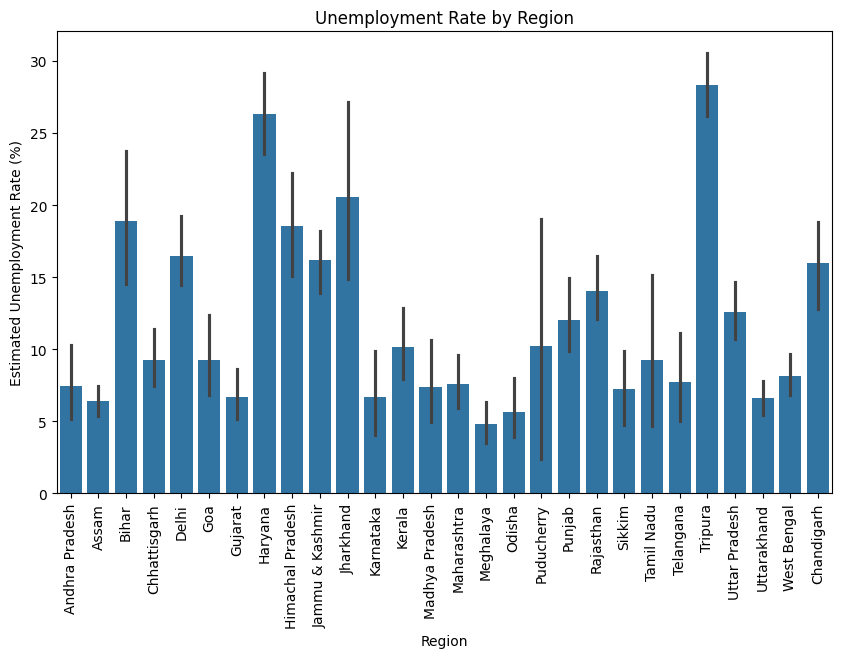

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.show()


6.2 Labour Participation Rate by Region

/tmp/ipython-input-3043803172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df, palette='coolwarm')


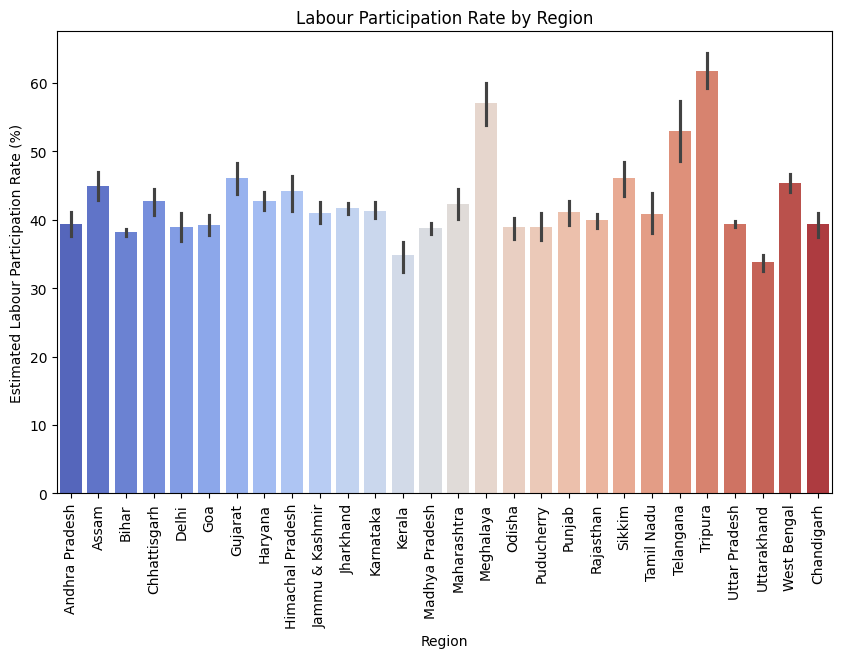

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Labour Participation Rate by Region")
plt.show()


 6.3 Trend of Unemployment Over Time

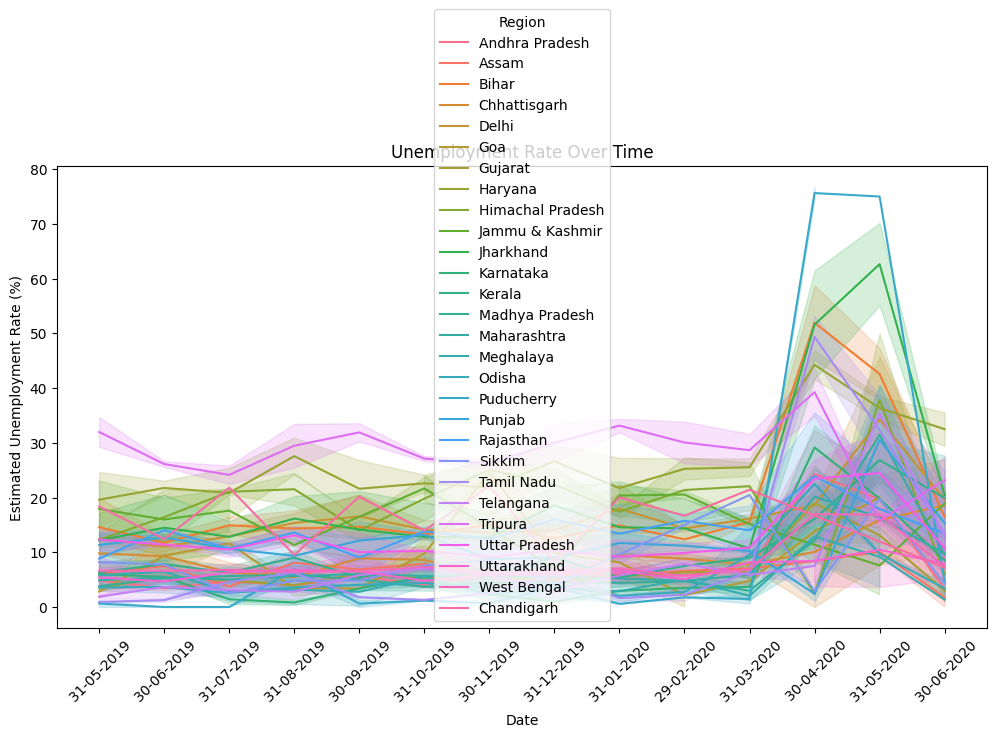

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, hue='Region')
plt.xticks(rotation=45)
plt.title("Unemployment Rate Over Time")
plt.show()


 Step 7: Correlation Heatmap

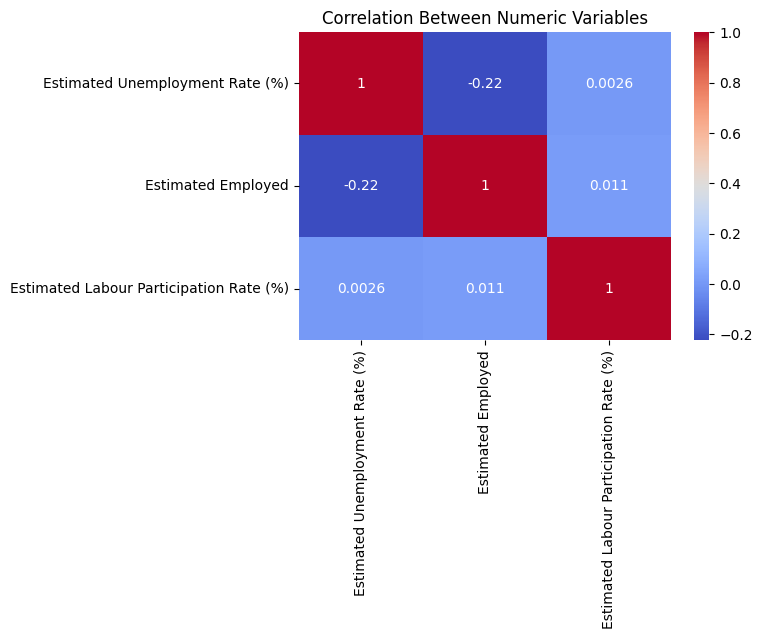

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Variables")
plt.show()



 Step 8: Summary Insights

In [16]:
print("Highest Unemployment Rate:", df['Estimated Unemployment Rate (%)'].max())
print("Lowest Unemployment Rate:", df['Estimated Unemployment Rate (%)'].min())
print("Average Unemployment Rate:", df['Estimated Unemployment Rate (%)'].mean())


Highest Unemployment Rate: 76.74
Lowest Unemployment Rate: 0.0
Average Unemployment Rate: 11.787945945945946


Step 9: Filter Data for COVID-19 Period

/tmp/ipython-input-3167441247.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


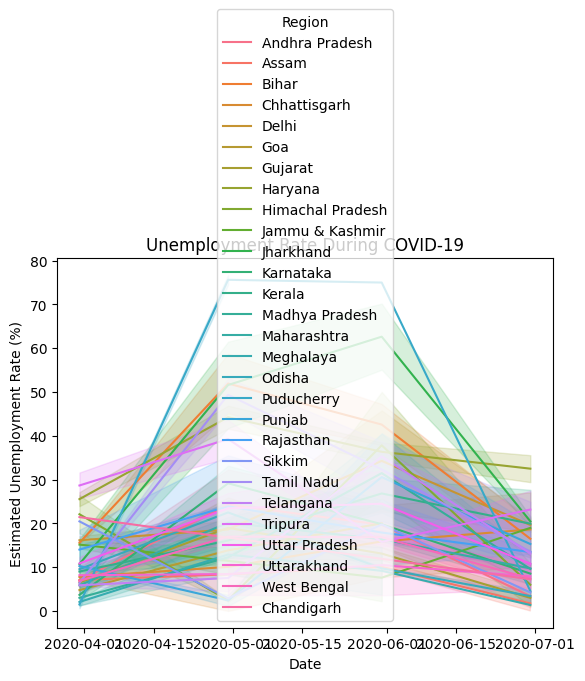

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2021-12-31')]
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=covid_period, hue='Region')
plt.title("Unemployment Rate During COVID-19")
plt.show()


Step 10: Save Cleaned Data

In [18]:
df.to_csv("Cleaned_Unemployment_Data.csv", index=False)
print("✅ Cleaned dataset saved successfully.")


✅ Cleaned dataset saved successfully.
